In [1]:
import pandas as pd

data = pd.read_csv('power_plant.csv')
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [2]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [3]:
data.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

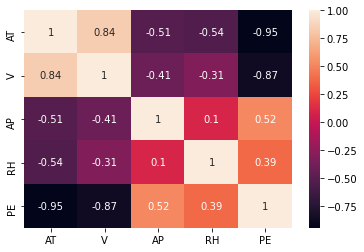

In [5]:
import seaborn as sns
 
# checking correlation using heatmap
#Loading dataset

 
#plotting the heatmap for correlation
ax = sns.heatmap(data.corr(), annot=True)  

In [6]:
col_to_scale =['AT','V','AP','RH','PE']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data[col_to_scale] = scaler.fit_transform(data[col_to_scale])
data.head()

,AT,V,AP,RH,PE
0,0.184986,0.274199,0.444197,0.863941,0.797616
1,0.618414,0.589502,0.458055,0.652011,0.337616
2,0.791218,0.561210,0.352883,0.219169,0.245033
3,0.488952,0.432918,0.354615,0.686729,0.434834
4,0.283003,0.272242,0.599852,0.960322,0.585033


In [7]:
X = data.drop('PE',axis = 1)
Y = data['PE']

from sklearn.model_selection import train_test_split

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
test_df = pd.concat ([X_test,y_test],axis =1 )

In [9]:
!pip install tensorflow

  Using cached tensorflow-2.11.0-cp38-cp38-win_amd64.whl (1.9 kB)
     ------------------------------------ 266.3/266.3 MB 211.2 kB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 155.5 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 308.1 kB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 147.8 kB/s eta 0:00:00
     ------------------------------------ 124.6/124.6 kB 811.0 kB/s eta 0:00:00
     ------------------------------------ 896.1/896.1 kB 420.0 kB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 594.0 kB/s eta 0:00:00
     -------------------------------------- 14.2/14.2 MB 185.4 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 858.7 kB/s eta 0:00:00
     ------------------------------------ 439.2/439.2 kB 457.8 kB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 605.5 kB/s eta 0:00:00
     ------------------------------------ 781.3/781.3 

In [23]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(2, input_shape = (4,),activation = 'relu'),
        keras.layers.Dense(1,activation = 'relu'),
])

model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error',
              metrics=['MeanSquaredLogarithmicError'])

model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
240/240 [==============================] - 1s 1ms/step - loss: 0.0574 - mean_squared_logarithmic_error: 0.0287
Epoch 2/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0204 - mean_squared_logarithmic_error: 0.0086
Epoch 3/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0162 - mean_squared_logarithmic_error: 0.0069
Epoch 4/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0131 - mean_squared_logarithmic_error: 0.0057
Epoch 5/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0110 - mean_squared_logarithmic_error: 0.0048
Epoch 6/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0095 - mean_squared_logarithmic_error: 0.0042
Epoch 7/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0084 - mean_squared_logarithmic_error: 0.0037
Epoch 8/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0075 - mean_squared_logarithmic_error: 0.0034
Epoch 9/100
240/

In [24]:
y_pred = model.predict(X_test) #2d array
#r adj->the ans should give diff ans

60/60 [==============================] - 0s 1ms/step


In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9416254067961571

In [26]:
mae_no=sklearn.metrics.mean_absolute_error(y_test,model.predict(X_test))
mae_no

60/60 [==============================] - 0s 1ms/step


0.04287717878214451

In [ ]:
#run the same data using stats models regression and output of adj r^2 
#from the neural model developed above can you get jac bera,dw test and all that values
